In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


# Initial Data Overview

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df.describe(include='all')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024,4024,4024,4024,4024,4024,4024,4024,4024.000000,4024,4024,4024.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.972167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.473658,NaN,NaN,14.357107,4.158052,71.297962,NaN
std,8.963134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.119696,NaN,NaN,8.099675,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


In [6]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

# Univariate Analysis

## Distribution of Numerical Variables

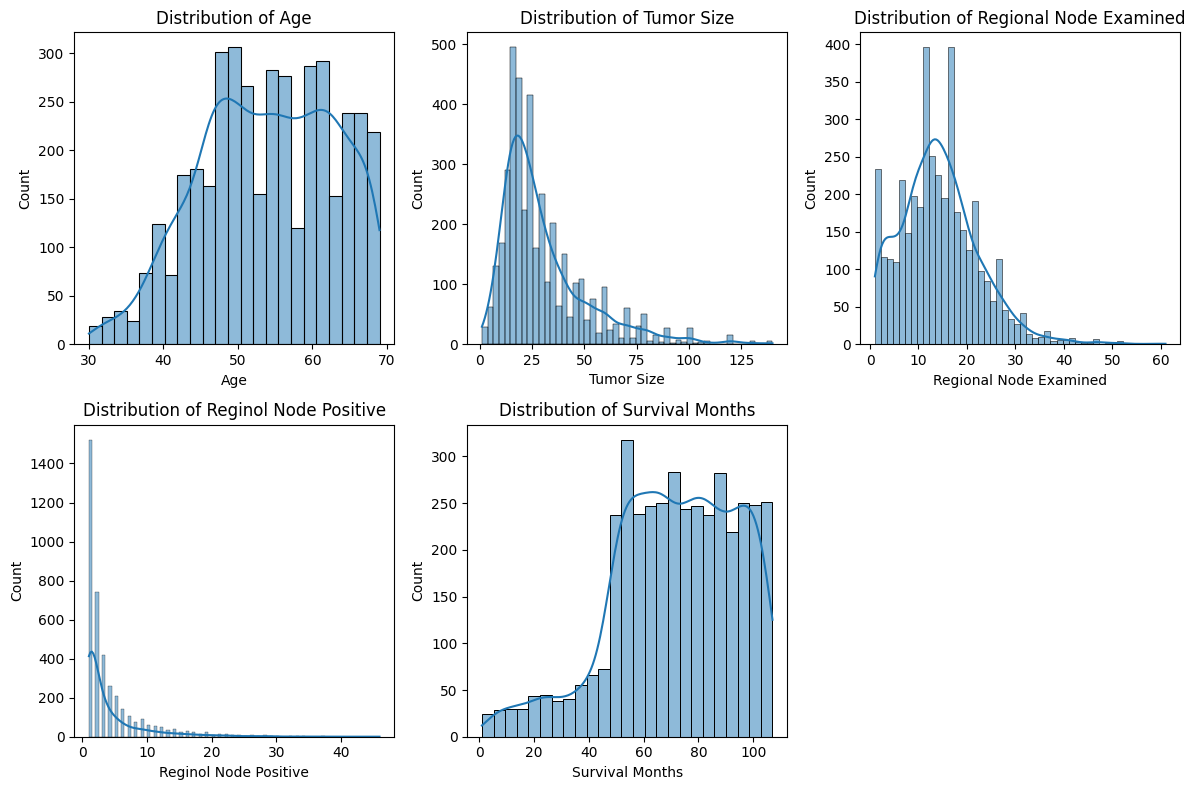

In [7]:
import warnings
# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows needed (two histograms per row)
n_cols = 3
n_rows = (len(numerical_columns) + 1) // n_cols

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# If there are unused subplots, hide them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Distribution of Categorical Variables

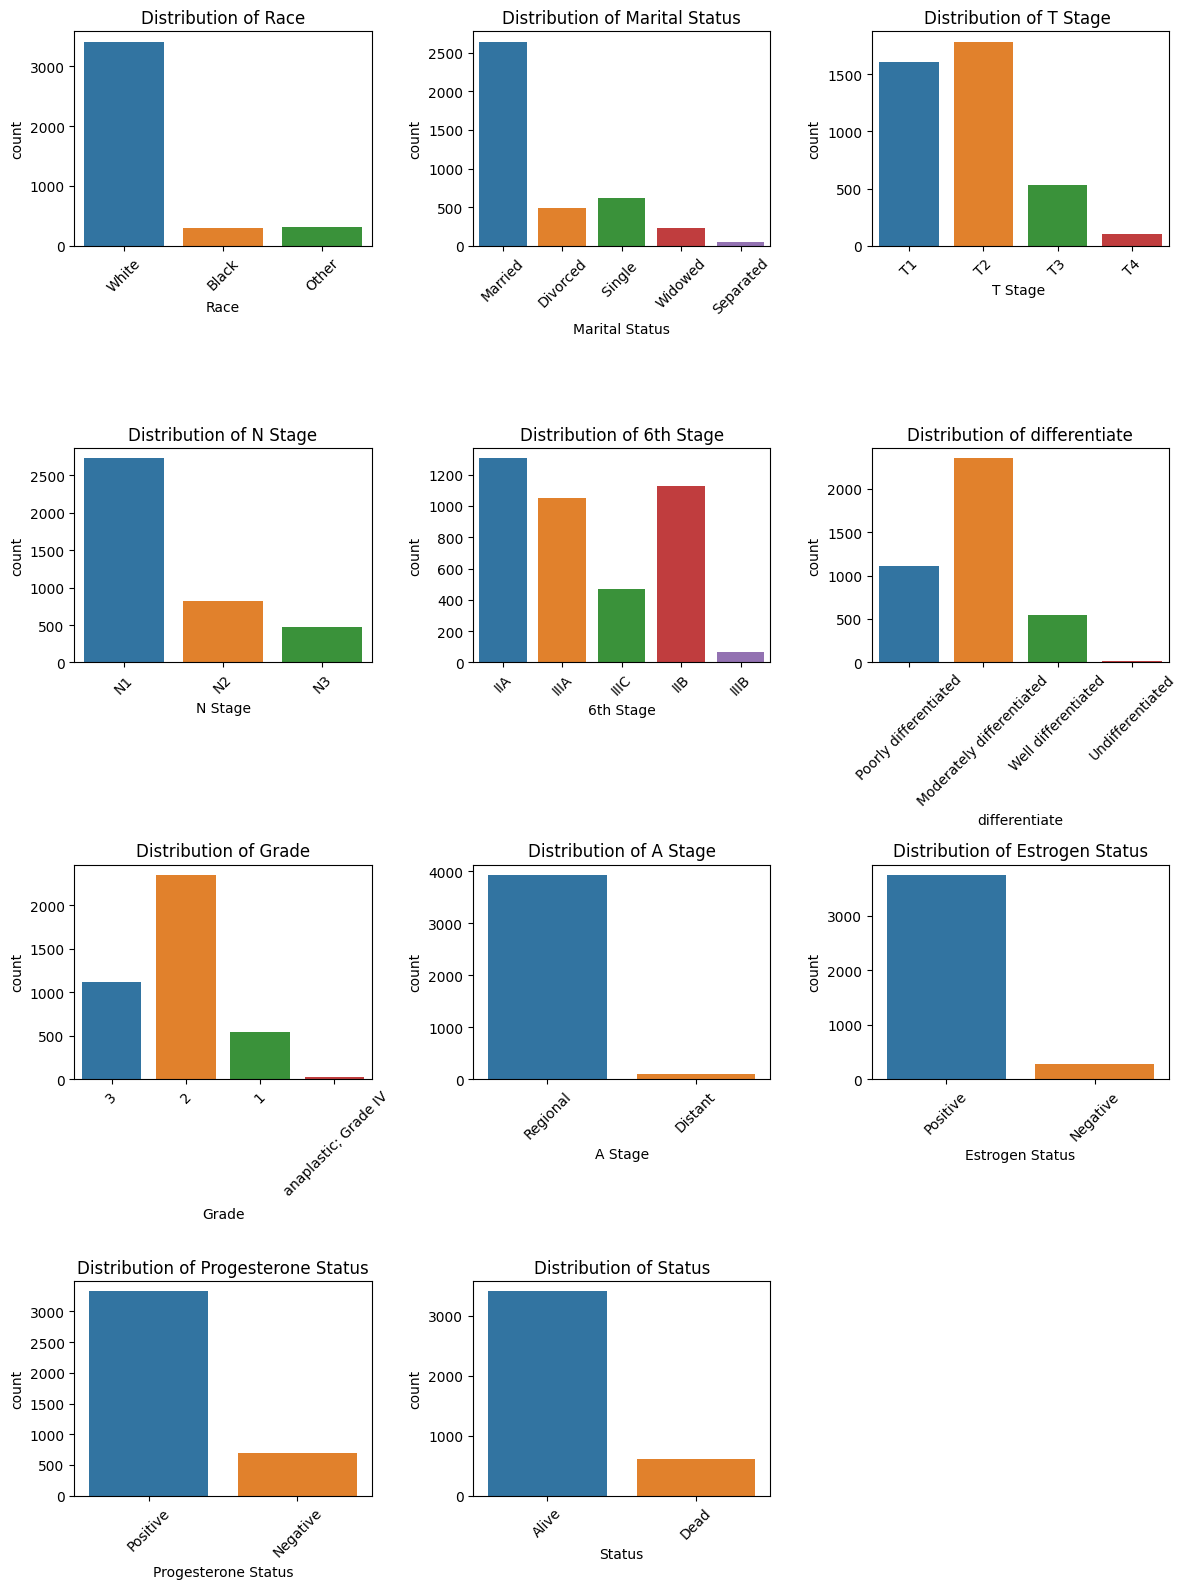

In [8]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Determine the number of rows needed (two plots per row)
n_cols = 3
n_rows = (len(categorical_columns) + 1) // n_cols

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# If there are unused subplots, hide them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Multivariate Analysis

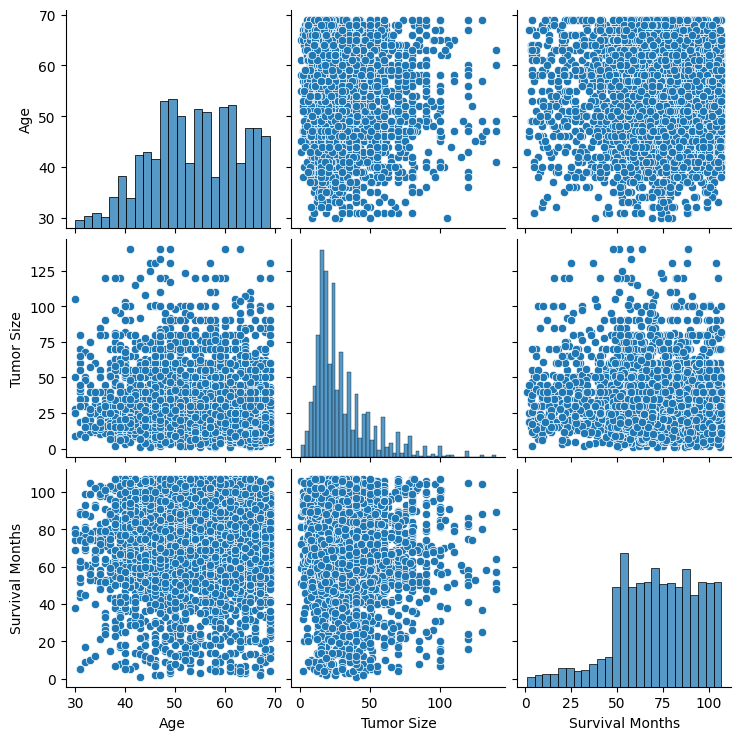

In [9]:
sns.pairplot(df[['Age', 'Tumor Size', 'Survival Months', 'Grade']])
plt.show()

**Relationships Between Variables**

* Age and Tumor Size: There appears to be a weak negative correlation between age and tumor size. This suggests that older individuals may be slightly less likely to have larger tumors, but the relationship is not very strong.
* Age and Survival Months: There doesn't seem to be a clear relationship between age and survival months. The scatter plot shows a random distribution of points, indicating no strong correlation.
* Tumor Size and Survival Months: There appears to be a weak negative correlation between tumor size and survival months. This suggests that larger tumors may be associated with slightly shorter survival times, but the relationship is not very strong.

# Survival Analysis

In [10]:
pip install lifelines 

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1105f8043e70f8b8a2112395b198f3b6a5d49dc9fdd52ff7f0dcd9dc2e480dea
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


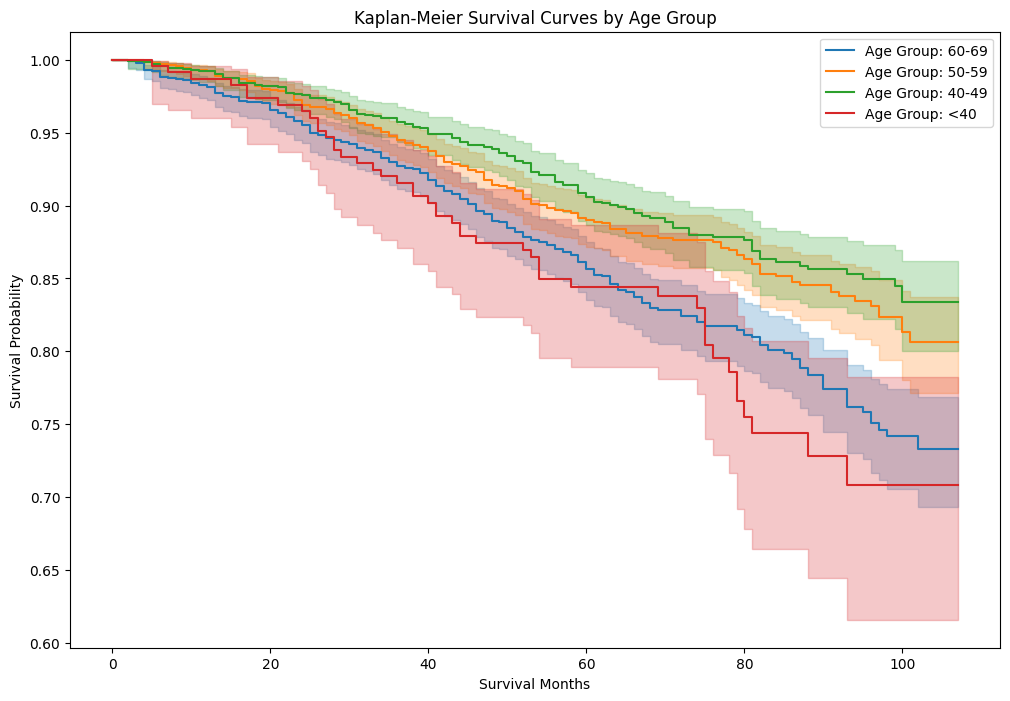

In [11]:
from lifelines import KaplanMeierFitter

# Define age bins and labels
bins = [0, 40, 50, 60, 70, 100]
labels = ['<40', '40-49', '50-59', '60-69', '70+']  # Added '70+' for completeness
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plot survival curves for different age groups
plt.figure(figsize=(12, 8))
for age_group in df['Age Group'].unique():
    mask = df['Age Group'] == age_group
    kmf.fit(durations=df[mask]['Survival Months'], event_observed=df[mask]['Status'] == 'Dead')
    kmf.plot_survival_function(label=f'Age Group: {age_group}')

plt.title('Kaplan-Meier Survival Curves by Age Group')
plt.xlabel('Survival Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

1. Survival Probability Declines Over Time:
All age groups show a decline in survival probability as time progresses, which is expected in survival analysis. The steepness of the decline varies between groups.
2. Younger Age Groups Generally Have Higher Survival Probabilities:
The age group <40 (red curve) generally starts with a high survival probability but declines more steeply than older groups in the early months. This might suggest that younger patients have a higher risk of mortality earlier on, or that those who survive past a certain period have better long-term outcomes.
Age groups 40-49, 50-59, and 60-69 (blue, green, and orange curves) have higher survival probabilities over time compared to the <40 group.
3. Older Age Groups (50-69) Have More Stable Survival Curves:
The survival curves for the age groups 50-59 and 60-69 (green and blue) are more stable and decline at a slower rate compared to younger patients. This might suggest that these patients have better or more stable outcomes after the initial period following diagnosis.
4. Differences in Confidence Intervals:
The shaded areas around each survival curve represent the confidence intervals. Narrower intervals (as seen in some of the curves for the middle-aged groups) suggest more precise survival estimates, while wider intervals (seen in the younger group <40) suggest more variability in survival estimates within that group.
5. Potential Implications:
These survival curves might suggest that younger patients (<40) are at a higher risk early on, but those who survive have better long-term outcomes.
The curves for patients aged 40-69 suggest more stable survival probabilities, with less variability, indicating a potentially better prognosis for these age groups.

# Stage vs. Survival Analysis

In [12]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Age Group'],
      dtype='object')

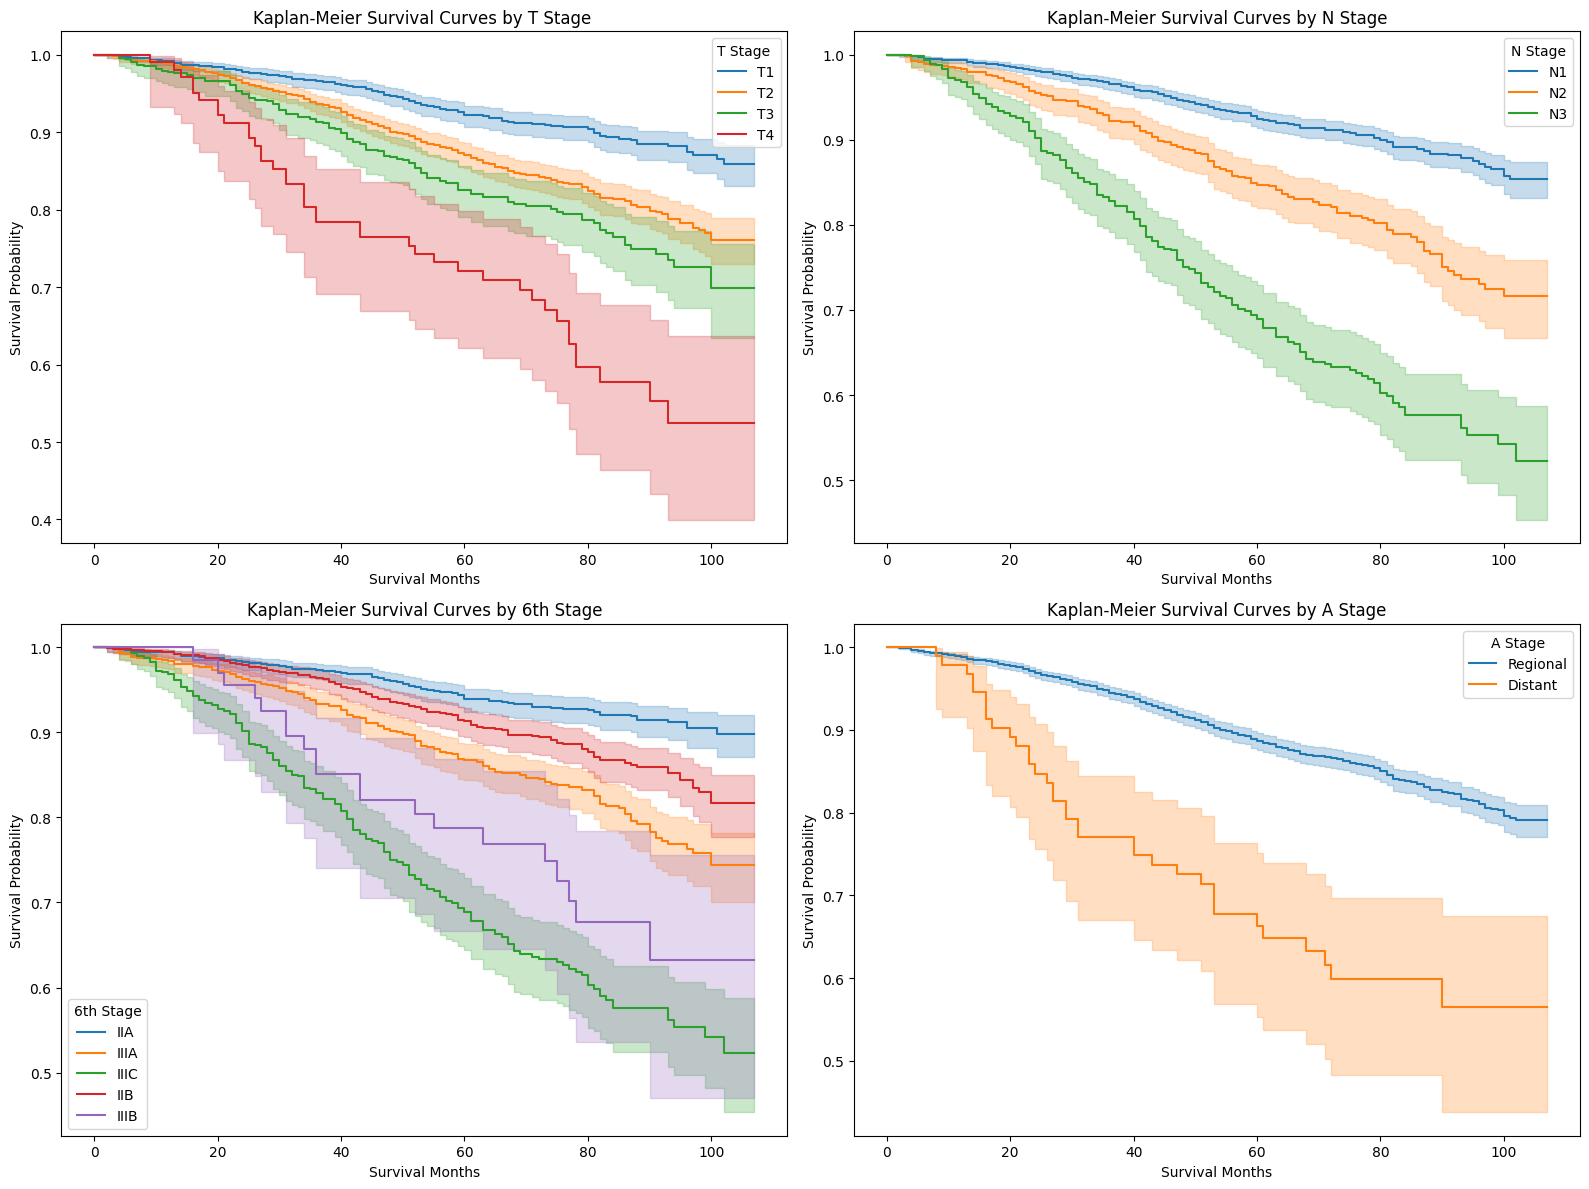

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

stages = ['T Stage ', 'N Stage', '6th Stage', 'A Stage']
titles = ['T Stage ', 'N Stage', '6th Stage', 'A Stage']

for idx, (stage, title) in enumerate(zip(stages, titles)):
    ax = axes.flatten()[idx]
    for stage_value in df[stage].unique():
        mask = df[stage] == stage_value
        kmf.fit(durations=df[mask]['Survival Months'], event_observed=df[mask]['Status'] == 'Dead')
        kmf.plot_survival_function(ax=ax, label=stage_value)
    
    ax.set_title(f'Kaplan-Meier Survival Curves by {title}')
    ax.set_xlabel('Survival Months')
    ax.set_ylabel('Survival Probability')
    ax.legend(title=stage)
    
plt.tight_layout()
plt.show()

* T Stage: Survival probability decreases as T stage increases. Patients with T1 stage generally have the highest survival rates, while those with T4 stage have the lowest. This suggests that the extent of tumor involvement is a significant predictor of survival.
* N Stage: Survival probability also decreases with increasing N stage. Patients with N1 stage have the best survival outcomes, followed by N2 and N3 stages. This indicates that the presence and extent of lymph node involvement are associated with poorer survival.
* 6th Stage: Survival probability varies among different 6th stage categories. While patients with 6th stage IIA and IIB generally have favorable outcomes, those with 6th stage IIIA, IIIB, and IIIC have significantly lower survival rates.
* A Stage: Survival probability is lower for patients with distant disease compared to those with regional disease.

# Analyzing the Correlation Heatmap

In [14]:
df_numerical = pd.get_dummies(df, columns=[
    'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
    'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'])

# Select only the numerical columns for correlation
numerical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
df_numerical = df_numerical[numerical_columns]

correlation_matrix = df_numerical.corr()

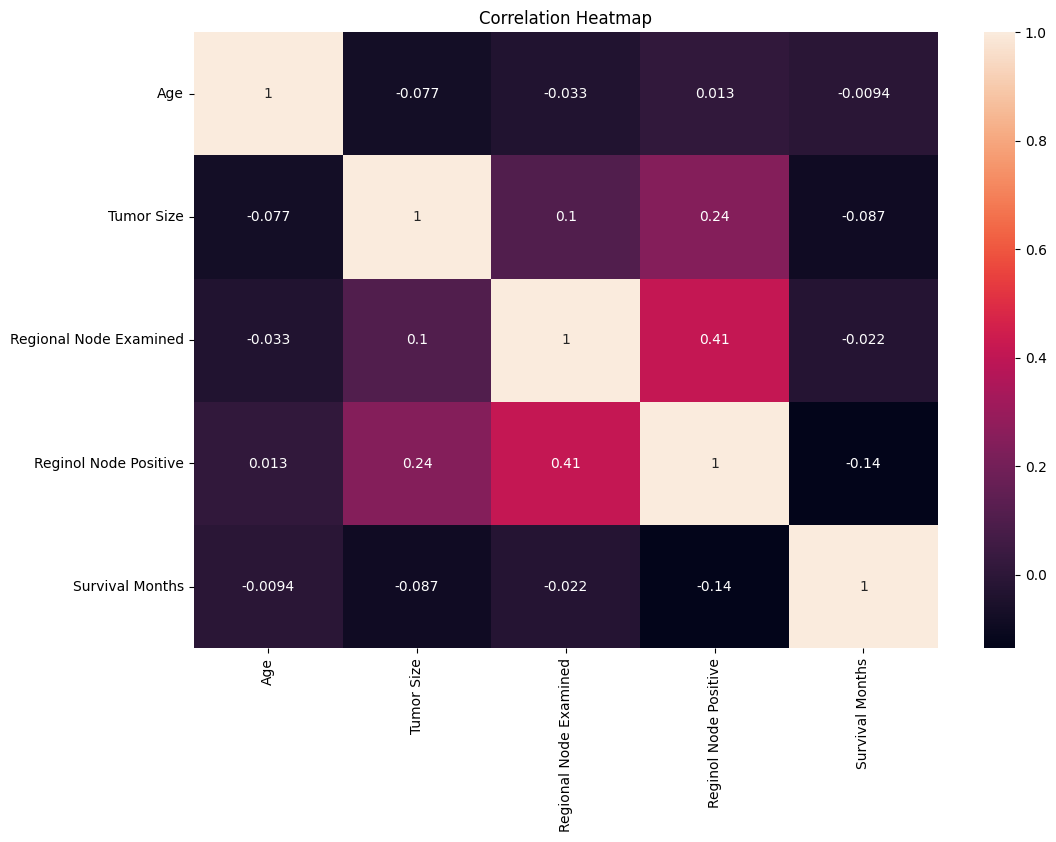

In [15]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

* Tumor Size and Survival Months: There's a weak negative correlation between tumor size and survival months. This suggests that larger tumors may be associated with slightly shorter survival times, but the relationship is not very strong.
* Regional Node Examined and Regional Node Positive: There's a strong positive correlation between these two variables, which is expected as the number of regional nodes examined is likely to influence the number of positive nodes.
* Regional Node Positive and Survival Months: There's a moderate negative correlation between regional node positive and survival months. This indicates that a higher number of positive regional nodes is associated with lower survival times.

# Tumor Size vs. Survival

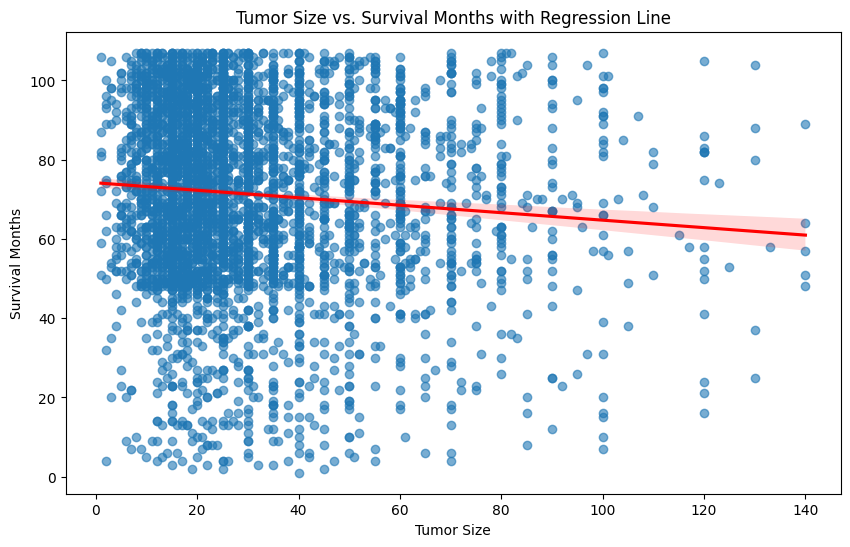

In [16]:
# Regression plot of Tumor Size vs. Survival Months
plt.figure(figsize=(10, 6))
sns.regplot(x='Tumor Size', y='Survival Months', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Tumor Size vs. Survival Months with Regression Line')
plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.show()

There appears to be a weak negative correlation between tumor size and survival months. This suggests that, generally, as tumor size increases, survival months tend to decrease. However, the relationship is not very strong, as indicated by the scatter of the data points.

# Regional Node Examination

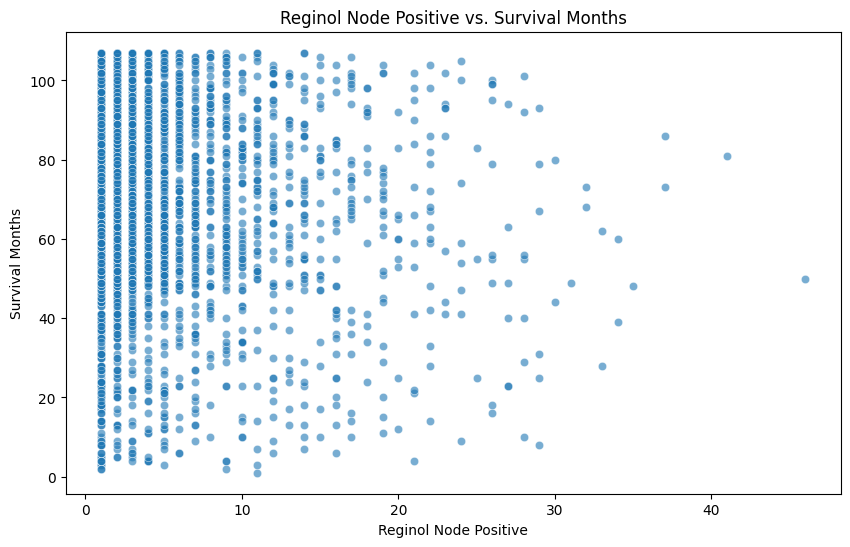

In [17]:
# Scatter plot of Reginol Node Positive vs. Survival Months
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reginol Node Positive', y='Survival Months', data=df, alpha=0.6)
plt.title('Reginol Node Positive vs. Survival Months')
plt.xlabel('Reginol Node Positive')
plt.ylabel('Survival Months')
plt.show()

In [18]:
# Calculate correlation
correlation_node_positive = df[['Reginol Node Positive', 'Survival Months']].corr().iloc[0, 1]
print(f'Correlation between Reginol Node Positive and Survival Months: {correlation_node_positive:.2f}')

Correlation between Reginol Node Positive and Survival Months: -0.14


* There appears to be a negative correlation between the number of regional nodes positive and survival months. This suggests that, generally, as the number of positive nodes increases, survival tends to decrease. However, the relationship is not very strong, as indicated by the scatter of the data points.
* The data points seem to cluster in certain areas, particularly around the lower values of regional nodes positive. This might indicate that there are other factors influencing survival that are more closely related to the number of positive nodes in these regions.

# Marital Status and Survival

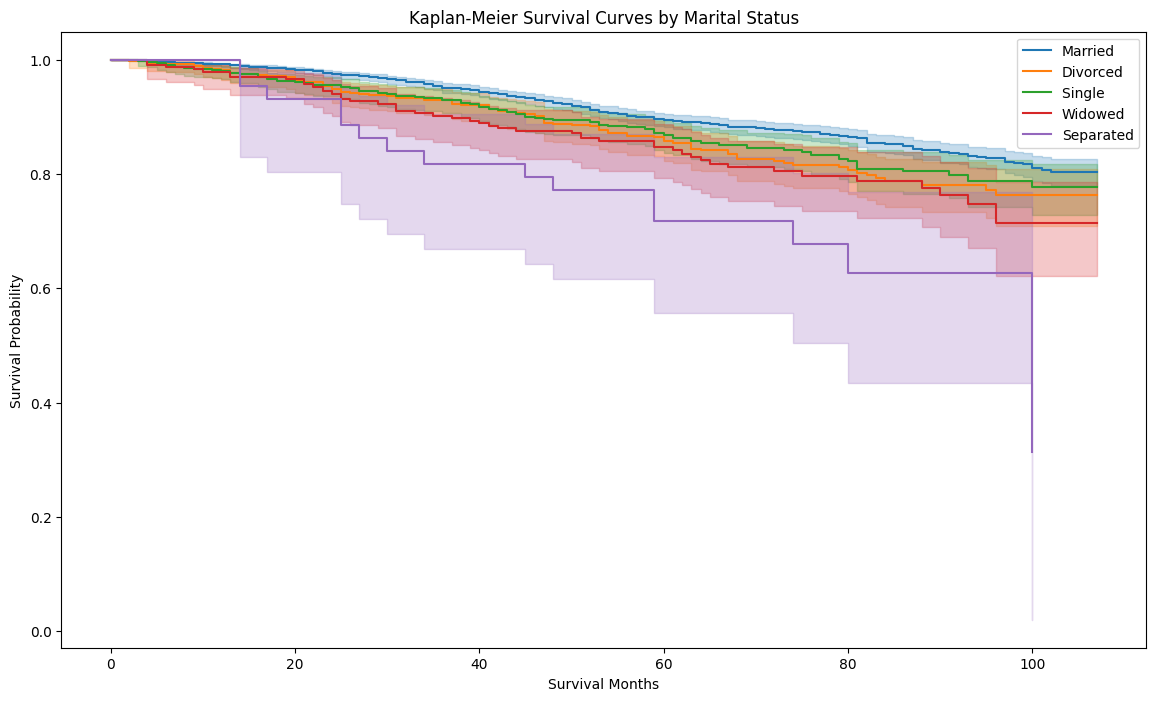

In [19]:
# Plot survival curves for different marital statuses
plt.figure(figsize=(14, 8))

for status in df['Marital Status'].unique():
    mask = df['Marital Status'] == status
    kmf.fit(durations=df[mask]['Survival Months'], event_observed=df[mask]['Status'] == 'Dead')
    kmf.plot_survival_function(label=f'{status}')

plt.title('Kaplan-Meier Survival Curves by Marital Status')
plt.xlabel('Survival Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

* Married individuals generally have higher survival probabilities: The curve for married individuals tends to be above the curves for other marital statuses, suggesting that married individuals are more likely to survive for longer periods.
* Divorced individuals have intermediate survival: The curve for divorced individuals falls between the curves for married and widowed individuals, suggesting that their survival probabilities are generally lower than married individuals but higher than widowed individuals.
* Single, widowed, and separated individuals have lower survival probabilities: The curves for single, widowed, and separated individuals tend to be below the curves for married and divorced individuals, indicating that these groups have lower survival rates.

# Survival Analysis by Race

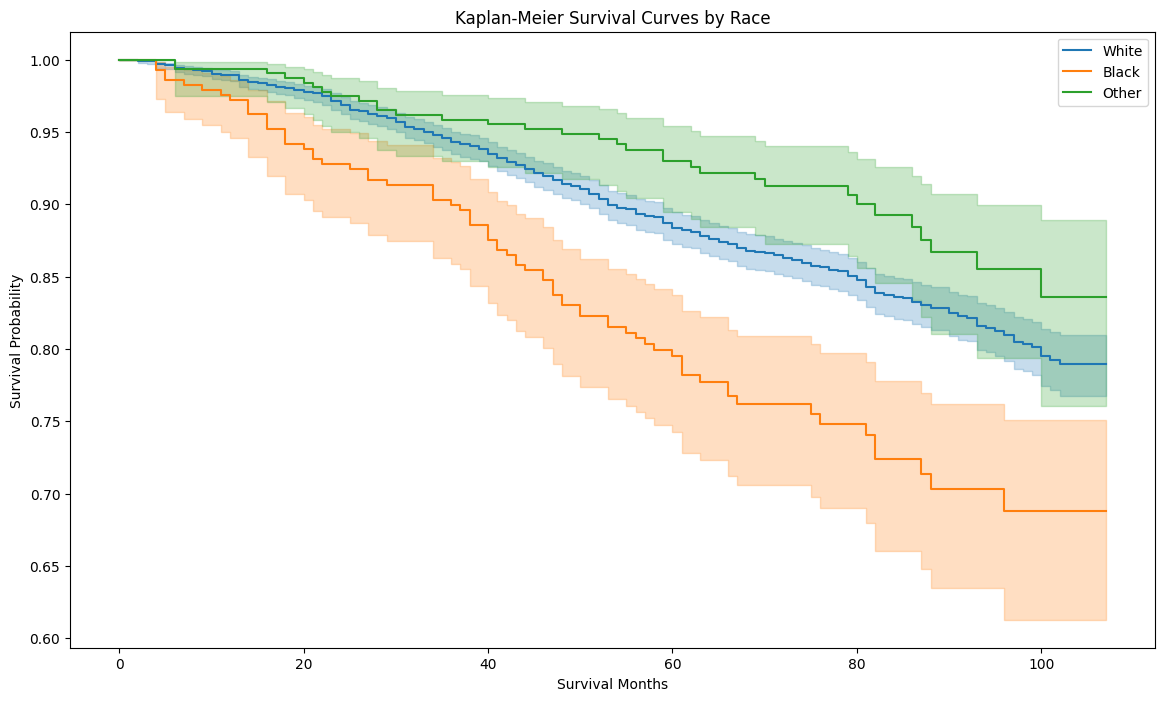

In [20]:
# Plot survival curves for different races
plt.figure(figsize=(14, 8))

for race in df['Race'].unique():
    mask = df['Race'] == race
    kmf.fit(durations=df[mask]['Survival Months'], event_observed=df[mask]['Status'] == 'Dead')
    kmf.plot_survival_function(label=f'{race}')

plt.title('Kaplan-Meier Survival Curves by Race')
plt.xlabel('Survival Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

* White individuals generally have higher survival probabilities: The curve for white individuals tends to be above the curves for other racial groups, suggesting that white individuals are more likely to survive for longer periods.
* Black individuals have lower survival probabilities: The curve for black individuals is below the curves for white and other individuals, indicating that black individuals have lower survival rates.
* Other individuals have intermediate survival: The curve for other individuals falls between the curves for white and black individuals, suggesting that their survival probabilities are generally lower than white individuals but higher than black individuals.

# Thank you!

Thanks for reviewing my notebook! 😊 Appreciate any recommendations on how to improve or advance this work further.